# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



Ingrese la velocidad constante de la moto (m/s): 15
Ingrese la aceleración constante del policía (m/s²): 3
Los dos se encuentran en t = 10.00 segundos.


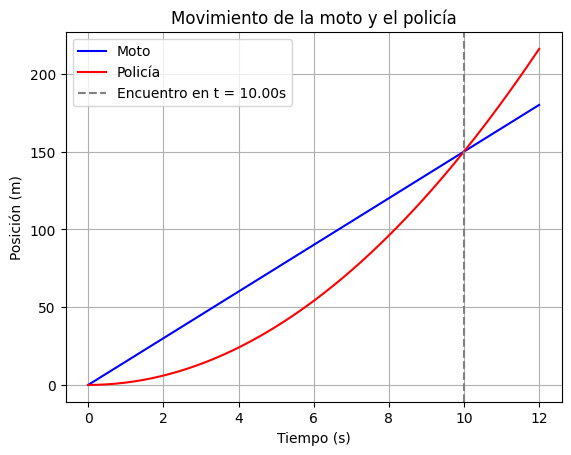

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Entradas del usuario
v_m = float(input("Ingrese la velocidad constante de la moto (m/s): "))
a_p = float(input("Ingrese la aceleración constante del policía (m/s²): "))

# Calculando el tiempo de encuentro directamente
t_encontrado = (2 * v_m) / a_p
print(f"Los dos se encuentran en t = {t_encontrado:.2f} segundos.")

# Tiempo para graficar: de 0 hasta un poco después del encuentro
t = np.linspace(0, t_encontrado + 2, 200)
x_moto = v_m * t
x_policia = 0.5 * a_p * t**2

# Gráfica
plt.plot(t, x_moto, label="Moto", color='blue')
plt.plot(t, x_policia, label="Policía", color='red')
plt.axvline(x=t_encontrado, linestyle='--', color='gray', label=f"Encuentro en t = {t_encontrado:.2f}s")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Movimiento de la moto y el policía")
plt.legend()
plt.grid(True)
plt.show()

---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




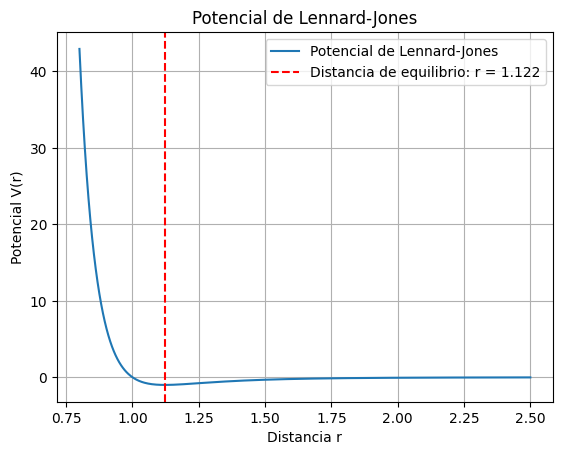

σ	| r_m (mínimo de V)	| 2^(1/6) * σ
---------------------------------------------
0.50	| 0.560811	| 0.561231
1.00	| 1.121622	| 1.122462
1.50	| 1.682432	| 1.683693
2.00	| 2.243243	| 2.244924


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#a.
def LJ_potencial(r, epsilon, sigma):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)
#b.
# Parámetros
epsilon = 1
sigma = 1
r_c = 2.5 * sigma

# Rango de r evitando dividir entre 0
r = np.linspace(0.8 * sigma, r_c, 500)
V = LJ_potencial(r, epsilon, sigma)

# Distancia de equilibrio teórica
r_m = 2**(1/6) * sigma

# Gráfica
plt.plot(r, V, label='Potencial de Lennard-Jones')
plt.axvline(x=r_m, color='red', linestyle='--', label=f'Distancia de equilibrio: r = {r_m:.3f}')
plt.title("Potencial de Lennard-Jones")
plt.xlabel("Distancia r")
plt.ylabel("Potencial V(r)")
plt.legend()
plt.grid(True)
plt.show()

#c.
# Función para encontrar r que minimiza V(r)
def encontrar_r_min(epsilon, sigma):
    r = np.linspace(0.8 * sigma, 2.5 * sigma, 1000)
    V = LJ_potencial(r, epsilon, sigma)
    idx_min = np.argmin(V)
    return r[idx_min]

# Probar con varios valores de sigma
sigmas = [0.5, 1, 1.5, 2]
print("σ\t| r_m (mínimo de V)\t| 2^(1/6) * σ")
print("---------------------------------------------")
for s in sigmas:
    r_minimo = encontrar_r_min(epsilon=1, sigma=s)
    teorico = 2**(1/6) * s
    print(f"{s:.2f}\t| {r_minimo:.6f}\t| {teorico:.6f}")

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


<Figure size 1400x600 with 0 Axes>

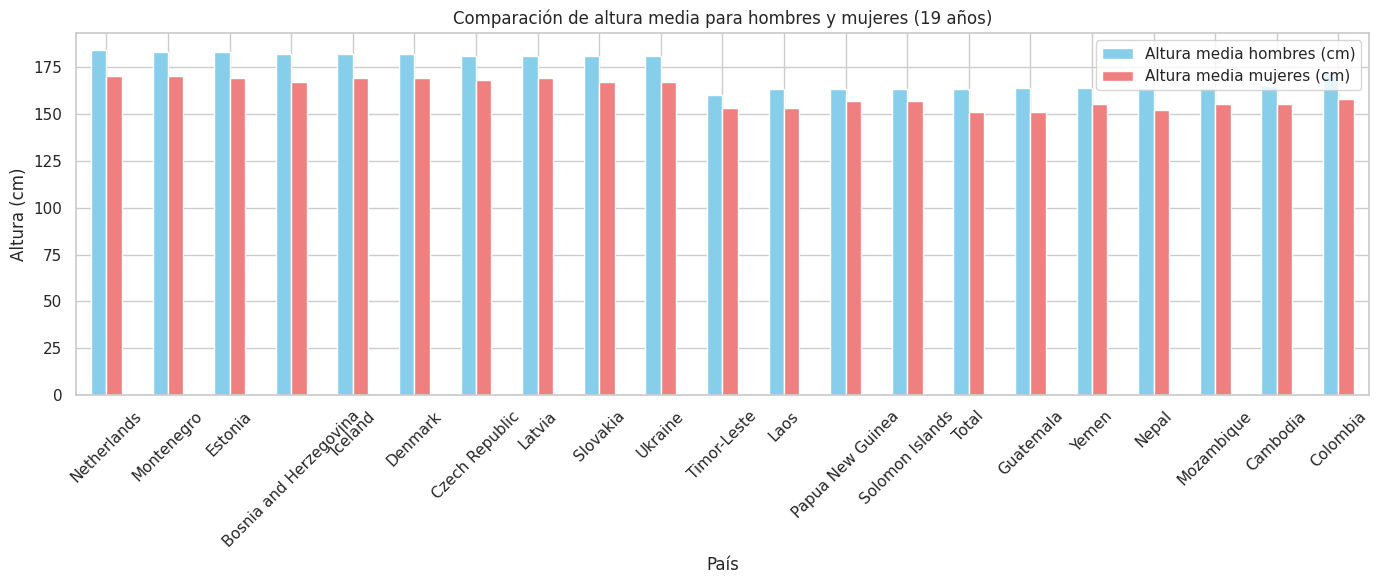

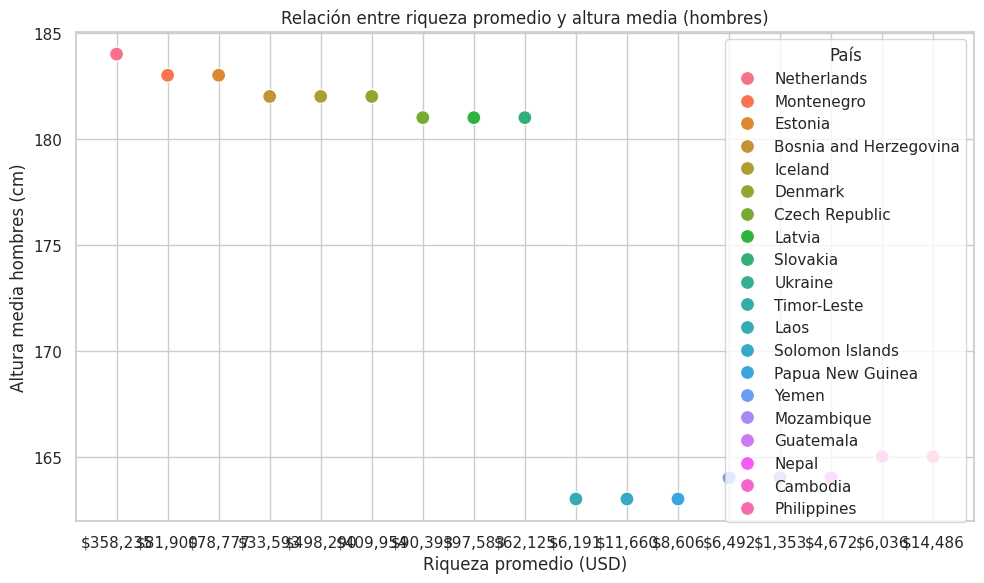

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set(style="whitegrid")

#a.............................................................................................
# Dataset 1: Altura por país

url_alturas = "https://worldpopulationreview.com/country-rankings/average-height-by-country"
alturas = pd.read_html(url_alturas)[0]

# Seleccionar y renombrar columnas reales
alturas = alturas[['Country', 'Average Height, Boys, 19 yo (cm)↓', 'Girls 19 (cm)']]
alturas.columns = ['País', 'Altura media hombres (cm)', 'Altura media mujeres (cm)']

#b.............................................................................................
# Dataset 2: Riqueza por país

url_income = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
income = pd.read_html(url_income)[0]

# Seleccionar y renombrar columnas reales
income = income[['Country', 'Wealth per Adult 2022↓']]
income.columns = ['País', 'Riqueza promedio (USD)']


# Agregar columna de diferencia

alturas["Diferencia hombres-mujeres (cm)"] = alturas['Altura media hombres (cm)'] - alturas['Altura media mujeres (cm)']

#c..............................................................................................
# Comparación de estaturas

top10 = alturas.sort_values(by='Altura media hombres (cm)', ascending=False).head(10)
bottom10 = alturas.sort_values(by='Altura media hombres (cm)', ascending=True).head(10)
colombia = alturas[alturas['País'] == 'Colombia']
comparacion_alturas = pd.concat([top10, bottom10, colombia], ignore_index=True)

plt.figure(figsize=(14, 6))
comparacion_alturas.set_index('País')[['Altura media hombres (cm)', 'Altura media mujeres (cm)']].plot(
    kind='bar',
    figsize=(14, 6),
    color=['skyblue', 'lightcoral']
)
plt.title("Comparación de altura media para hombres y mujeres (19 años)")
plt.ylabel("Altura (cm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


# Relación entre altura y riqueza

datos_combinados = pd.merge(alturas, income, on='País')

top10_altura = datos_combinados.sort_values(by='Altura media hombres (cm)', ascending=False).head(10)
bottom10_altura = datos_combinados.sort_values(by='Altura media hombres (cm)', ascending=True).head(10)
datos_altura_riqueza = pd.concat([top10_altura, bottom10_altura])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=datos_altura_riqueza,
    x='Riqueza promedio (USD)',
    y='Altura media hombres (cm)',
    hue='País',
    s=100
)
plt.title("Relación entre riqueza promedio y altura media (hombres)")
plt.xlabel("Riqueza promedio (USD)")
plt.ylabel("Altura media hombres (cm)")
plt.grid(True)
plt.tight_layout()
plt.show()